## 1. Import the datasets and libraries, check datatype, statistical summary, shape, null values or incorrect imputation. (5 marks)

In [49]:
#Importing all the necesary libararies 

import numpy as np
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.linear_model import LogisticRegression

#Sklearn package's data splitting function which is based on random function
from sklearn.model_selection import train_test_split 

#calculate accuracy measures and confusion matrix
from sklearn import metrics  

import warnings
warnings.filterwarnings("ignore")

In [50]:
#loading the given dataset
df1 = pd.read_csv("Bank_Personal_Loan_Modelling.csv")

In [51]:
#Displaying the first five dataframes of dataset
df1.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [4]:
#Checking the datatype
df1.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIP Code                int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal Loan           int64
Securities Account      int64
CD Account              int64
Online                  int64
CreditCard              int64
dtype: object

In [5]:
#checking the statistical summary of dataset
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [6]:
#Shape of the dataset
df1.shape

(5000, 14)

In [7]:
#Checking the Null values if there are any
df1.isnull().values.any()

False

In [8]:
# Incorrect Incomputation
# From the above statistical analysis we can see the Eperience column has some negative values which is very unlikely.
# So in order to fix this incorrect incomputation we can replace those negative values with absolute number by using .abs()
df1["Experience"] = df1["Experience"].abs()
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [9]:
df1["Experience"].value_counts()

32    154
20    148
9     147
5     146
23    144
35    143
25    142
28    138
18    137
19    135
26    134
3     133
24    131
16    127
14    127
30    126
34    125
27    125
17    125
22    124
29    124
7     121
6     119
8     119
15    119
10    118
33    117
13    117
37    116
11    116
36    114
21    113
4     113
1     107
31    104
12    102
2     100
38     88
39     85
0      66
40     57
41     43
42      8
43      3
Name: Experience, dtype: int64

## 2. EDA: Study the data distribution in each attribute and target variable, share your findings. (20 marks)
 Number of unique in each column?

 Number of people with zero mortgage?

 Number of people with zero credit card spending per month?

 Value counts of all categorical columns.

 Univariate and Bivariate

 Get data model ready

In [10]:
#Number of unique in each coliumn
#The nunique() function returns the count of unique elements in each column
df1.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

In [11]:
#Calculating the number of people with zero mortgage
(df1["Mortgage"] == 0).sum()

3462

In [12]:
#Calculating the number of people with zero credit card spending per month
(df1["CCAvg"] == 0).sum()

106

In [13]:
#Value counts of all categorical columns
# There are 8 catagorical columns present in the given dataset viz., "ID", "ZIP Code", "Family", "Education", 
# "Personal Loan", "Securities account", "CD Account" and "Credit Card"
df1[["ID", "ZIP Code", "Family", "Education", "Personal Loan", "Securities Account", "CD Account", "CreditCard"]].apply(pd.Series.value_counts)

,ID,ZIP Code,Family,Education,Personal Loan,Securities Account,CD Account,CreditCard
0,NaN,NaN,NaN,NaN,4520.0,4478.0,4698.0,3530.0
1,1.0,NaN,1472.0,2096.0,480.0,522.0,302.0,1470.0
2,1.0,NaN,1296.0,1403.0,NaN,NaN,NaN,NaN
3,1.0,NaN,1010.0,1501.0,NaN,NaN,NaN,NaN
4,1.0,NaN,1222.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
96091,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN
96094,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
96145,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
96150,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN


### > Vizualizing univariate and bivariate plots for different columns and the relation between them.

#### displaying the univariate plots for different columns except ID which we can ignore

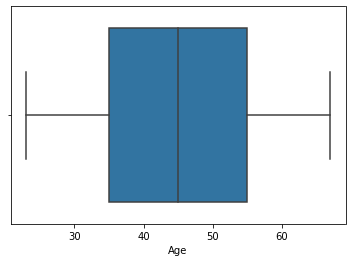

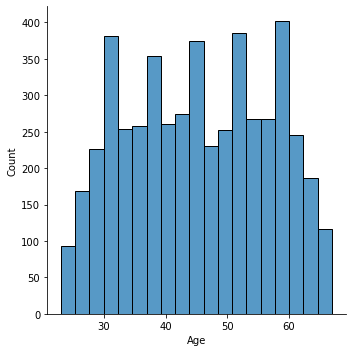

In [14]:
#Age 
sns.boxplot(x="Age", data = df1)
plt.show()
sns.displot(df1["Age"])
plt.show()

The above plot shows that most of the customers have age ranging somewhere between 25 to 60 years

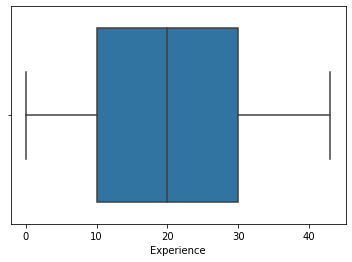

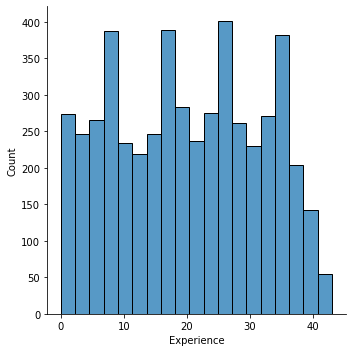

In [15]:
#Experience
sns.boxplot(x="Experience", data = df1)
plt.show()
sns.displot(df1["Experience"])
plt.show()

Most of the customers have experience lies about between 5 to 35 years

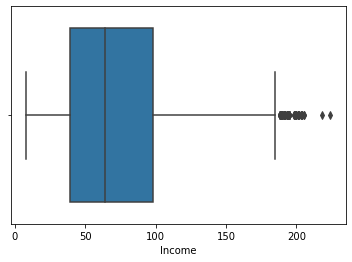

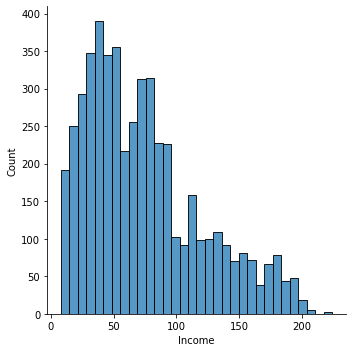

In [16]:
#Income
sns.boxplot(x="Income", data=df1)
plt.show()
sns.displot(df1["Income"])
plt.show()

we can observe from the above plots that Income has some outliers and skewed to the right.We can also observe that most of the people have income between about 25k to 100k.

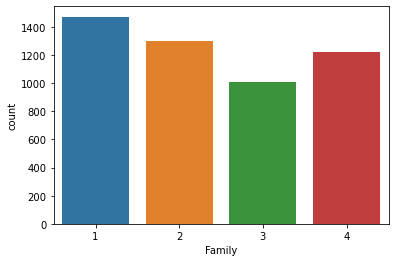

In [17]:
#Family
sns.countplot(df1["Family"])
plt.show()

data for family seems evenly distributed

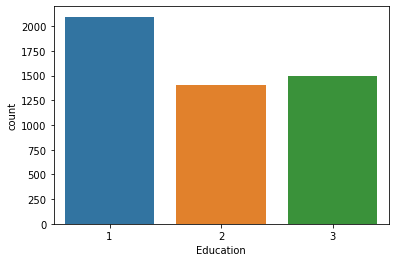

In [18]:
#Education
sns.countplot(df1["Education"])
plt.show()

Education data seems evenly distributed

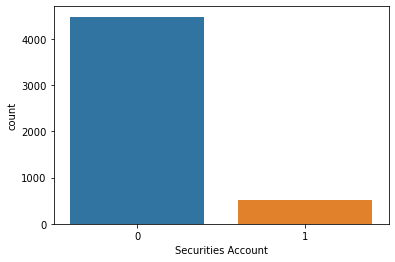

In [19]:
#Securities Account
sns.countplot(df1["Securities Account"])
plt.show()

very less people seems to have Securities account

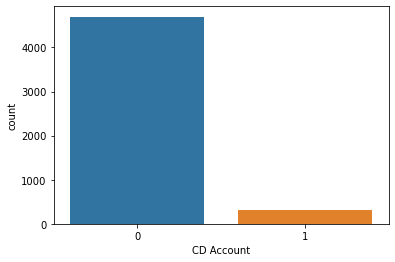

In [20]:
#CD Accoount
sns.countplot(df1["CD Account"])
plt.show()

vey less people seems to have CD Account

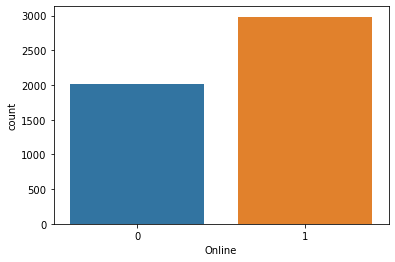

In [21]:
#Online
sns.countplot(df1["Online"])
plt.show()

more people seems to use online banking facility

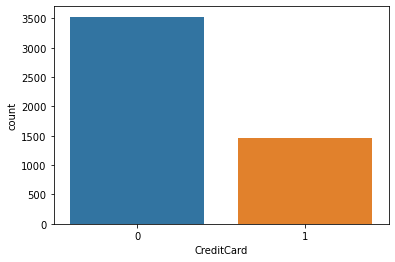

In [22]:
#CreditCard
sns.countplot(df1["CreditCard"])
plt.show()

less people seems to use Credit card issues by the bank

#### Displaying the relationship between Personal loan with diffrent columns by bivariate plots

In [23]:
# defining a function which wiil vizualize the relation between personal loan and other variables in the dataset
def relationBetweenVariables(var1, countplot=False, var2 = None):
    if countplot:
        sns.countplot(x = var1, hue = "Personal Loan", data = df1)
        plt.show()
    else:
        sns.boxplot(x = var1, y = var2, hue = "Personal Loan", data = df1)
        plt.show()

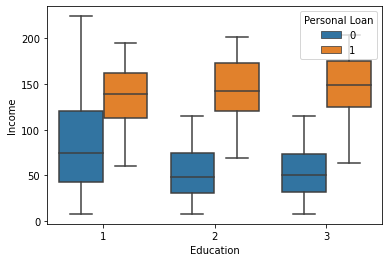

In [24]:
#The affect of Education and Income in relation with Personal Loan
relationBetweenVariables("Education", False, "Income")

People with higher income likely to choose the personal loan more and the difference get larger as the education level increases

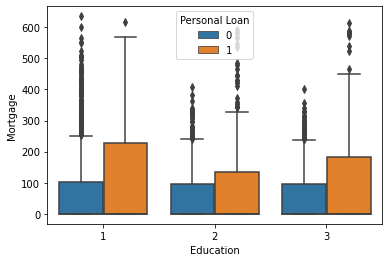

In [25]:
# The affect of Education and Income in relation to Personal Loan
relationBetweenVariables("Education", False, "Mortgage")

People with higher mortgage more likely to go for personal loan

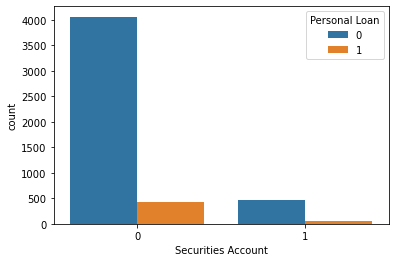

In [26]:
# relation between Securities account and Personal Loan
relationBetweenVariables("Securities Account", True)

The people who didn't seem to take the personal Loan tend to have a Securities Account but in general people tends to have very low number of Securities account irrespective of their decision to take Personal Loan

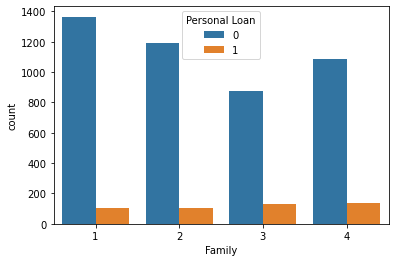

In [27]:
#relation between Family and personal account
relationBetweenVariables("Family", True)

It doensn't seem to be very high effects on the size of the family member in connection to whether the customers

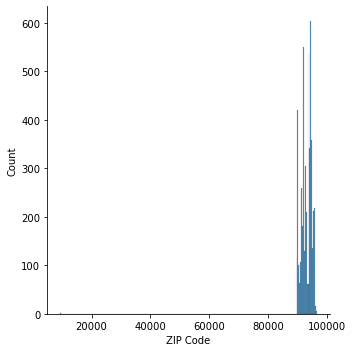

The top five zip codes where people tends to have Personal Loan


94720    19
94305    13
92093     9
90095     8
90089     8
Name: ZIP Code, dtype: int64

In [28]:
#ZIP Code and personal Loan
sns.displot(df1["ZIP Code"])
plt.show()
print("The top five zip codes where people tends to have Personal Loan")
df1[df1["Personal Loan"]==1]["ZIP Code"].value_counts().head()

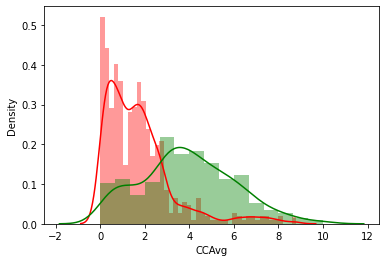

In [29]:
#Relation between Credit card avegrage and Personal Loan
sns.distplot( df1[df1["Personal Loan"] == 0]["CCAvg"], color = "r");
sns.distplot( df1[df1["Personal Loan"] == 1]['CCAvg'], color = "g");

People who have higher Credit card average tends to have higher Personal Loan

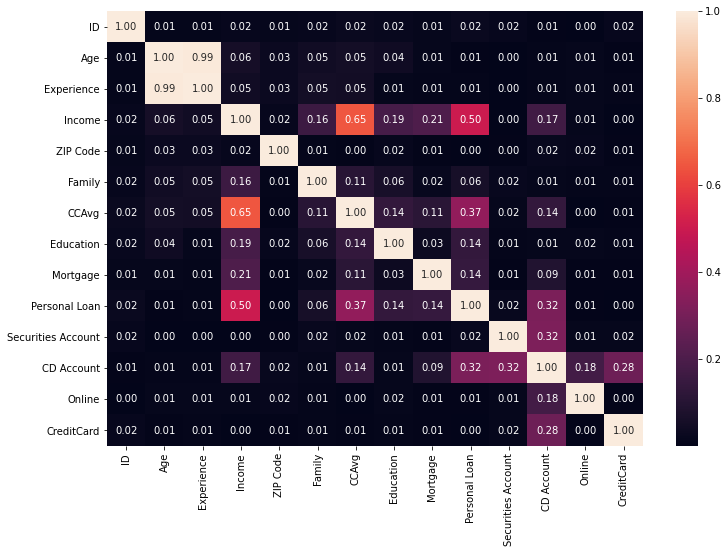

In [30]:
# correlation between diffrent variables 
plt.figure(figsize=(12,8))
sns.heatmap(np.abs(df1.corr()), annot=True, fmt=".2f")
plt.show()

Age and Experience very strongly correlated i.e 0.99

Income and CCAvg are moderately correlated i.e. 0.65

###  > Get data model ready

In [31]:
#Before we proceeding futher with regression analysis we can get rid of unwanted columns such as ID, Experience, Peersonal Loan
X = df1.drop(["ID", "Experience", "Personal Loan"], axis=1)
y = df1["Personal Loan"]

## 3. Split the data into training and test set in the ratio of 70:30 respectively

In [32]:
#Spliting the data into 70:30 ration
from sklearn.model_selection import train_test_split
from sklearn import metrics

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

In [33]:
X_train.shape, X_test.shape

((3500, 11), (1500, 11))

In [34]:
y_train.shape, y_test.shape

((3500,), (1500,))

In [35]:
# It's better to check the effect of scaling on the dataset, we create another set of data with scaling function applied to it
from sklearn import preprocessing
SX = preprocessing.scale(X)
SX_train, SX_test, y_train, y_test = train_test_split(SX, y, test_size=0.3, random_state=10)

## 4. Use Logistic Regression model to predict whether the customer will take personal loan or not. Print all the metrics related for evaluating the model performance (15 marks)

#### Logistic regression

In [37]:
# Importing lbraries from the SCIKIT LEARN
from sklearn.linear_model import LogisticRegression

model_a = LogisticRegression()

# Applying training data to the logistic regression model
model_a.fit(X_train, y_train)

# Predicting the test results
y_predict = model_a.predict(X_test)

# Caculating the coefficients of logistic regression model
t = list(X_train.columns)
coef_df = pd.DataFrame(model_a.coef_, columns= t)
coef_df["intercept"] = model_a.intercept_
print(coef_df)

        Age    Income  ZIP Code    Family     CCAvg  Education  Mortgage  \
0 -0.000215  0.037817 -0.000067  0.000158  0.001077   0.000261  0.000563   

   Securities Account  CD Account    Online  CreditCard  intercept  
0            0.000024    0.000137 -0.000004    0.000001  -0.000001  


In [38]:
# Calculating the model score and print confusion matrix
model_a_score = model_a.score(X_test, y_test)

print(model_a_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.9013333333333333
[[1305   55]
 [  93   47]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      1360
           1       0.46      0.34      0.39       140

    accuracy                           0.90      1500
   macro avg       0.70      0.65      0.67      1500
weighted avg       0.89      0.90      0.89      1500



In [39]:
# Applying Scaled training data to the logistic regression model
model_b = LogisticRegression()
model_b.fit(SX_train, y_train)

# Predicting the test results
y_predict = model_b.predict(SX_test)

# Calculating the coefficients of logistic regression model

coef_df = pd.DataFrame(model_b.coef_, columns= t)
coef_df["intercept"] = model_b.intercept_
print(coef_df)

        Age   Income  ZIP Code   Family     CCAvg  Education  Mortgage  \
0  0.095939  2.52376 -0.028628  0.78718  0.188024   1.390163   0.00075   

   Securities Account  CD Account    Online  CreditCard  intercept  
0           -0.216034    0.868527 -0.372198   -0.489009  -4.617005  


In [40]:
model_b_score = model_b.score(SX_test, y_test)

print(model_b_score)
print(metrics.confusion_matrix(y_test, y_predict))
print(metrics.classification_report(y_test, y_predict))

0.9526666666666667
[[1339   21]
 [  50   90]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1360
           1       0.81      0.64      0.72       140

    accuracy                           0.95      1500
   macro avg       0.89      0.81      0.85      1500
weighted avg       0.95      0.95      0.95      1500



In [41]:
print("Train score: {}".format(model_b.score(SX_train, y_train) * 100))
print("Test score: {}".format(model_b.score(SX_test, y_test) * 100))

Train score: 95.02857142857142
Test score: 95.26666666666667


### Model building
#### Naive Bayes

In [42]:
# Importing lbraries from the SCIKIT LEARN
from sklearn.naive_bayes import GaussianNB
model_2a = GaussianNB()
model_2a.fit(X_train,y_train)
y_predict = model_2a.predict(X_test)
model_2a_score = model_2a.score(X_test, y_test)

print(model_2a_score)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

0.886
              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1360
           1       0.42      0.61      0.50       140

    accuracy                           0.89      1500
   macro avg       0.69      0.76      0.72      1500
weighted avg       0.91      0.89      0.90      1500

[[1243  117]
 [  54   86]]


In [43]:
model_2b = GaussianNB()
model_2b.fit(SX_train,y_train)
y_predict = model_2b.predict(SX_test)
model_2b_score = model_2b.score(SX_test, y_test)

print(model_2b_score)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

0.8786666666666667
              precision    recall  f1-score   support

           0       0.96      0.91      0.93      1360
           1       0.40      0.60      0.48       140

    accuracy                           0.88      1500
   macro avg       0.68      0.75      0.71      1500
weighted avg       0.90      0.88      0.89      1500

[[1234  126]
 [  56   84]]


#### K-Nearest Neighbors (KNN)

In [44]:
# Importing lbraries from the SCIKIT LEARN
from sklearn.neighbors import KNeighborsClassifier
knn_a= KNeighborsClassifier(n_neighbors= 3 , weights = "distance" )
knn_a.fit(X_train, y_train)
y_predict = knn_a.predict(X_test)
knn_a_score = knn_a.score(X_test, y_test)

print(knn_a_score)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

0.8813333333333333
              precision    recall  f1-score   support

           0       0.93      0.94      0.93      1360
           1       0.34      0.30      0.32       140

    accuracy                           0.88      1500
   macro avg       0.64      0.62      0.63      1500
weighted avg       0.87      0.88      0.88      1500

[[1280   80]
 [  98   42]]


In [45]:
knn_b = KNeighborsClassifier(n_neighbors= 3 , weights = "distance")
knn_b.fit(SX_train, y_train)
y_predict = knn_b.predict(SX_test)
knn_b_score = knn_b.score(SX_test, y_test)

print(knn_b_score)
print(metrics.classification_report(y_test, y_predict))
print(metrics.confusion_matrix(y_test, y_predict))

0.964
              precision    recall  f1-score   support

           0       0.97      0.99      0.98      1360
           1       0.92      0.67      0.78       140

    accuracy                           0.96      1500
   macro avg       0.94      0.83      0.88      1500
weighted avg       0.96      0.96      0.96      1500

[[1352    8]
 [  46   94]]


##### ----------------------------------------------------------------------------------------------------------------------------------------------------------------------

The accuracy of the test Logistic regression after scaling on the dataset is 95.26%, which is very high accuracy.In the current dataset, the attributes like income, CC Avergae, CD account have good corelation with personal loan, which make the Logistic regression directly apply the sigmoid function and get the probablity to predict whether a customer is opting for Personal Loan.

##### Here we can come to the understanding  that people having high Income & CCAvg,  having CD & Securities account  and Family consisting of more than 3 members have higher chances of taking Personal Loan.

## 5. Check different parameters of Logistic Regression and give your reasoning whether the model performance is affected due to it or not? (10 marks)

### Models Comparision and evaluation

In [46]:
Accuracy_Before_Scaling = {"Logistic Regression": model_a_score, "Naive Bayes": model_2a_score, "K-Nearest Neighbors": knn_a_score}
Accuracy_After_Scaling = {"Logistic Regression": model_b_score, "Naive Bayes": model_2b_score, "K-Nearest Neighbors": knn_b_score}

print("Model Accuracy before scaling:")
print (Accuracy_Before_Scaling)
print(" ")
print("Model Accuracy After scaling:")
print (Accuracy_After_Scaling)

Model Accuracy before scaling:
{'Logistic Regression': 0.9013333333333333, 'Naive Bayes': 0.886, 'K-Nearest Neighbors': 0.8813333333333333}
 
Model Accuracy After scaling:
{'Logistic Regression': 0.9526666666666667, 'Naive Bayes': 0.8786666666666667, 'K-Nearest Neighbors': 0.964}


From the above calculation, we can clearly see that k-Nearest neighbors(KNN) algorithm with scaled data gives us the best accuracy of 96.4%, as well as the least Type 1 (False Positive) and Type 2 (False Negative) errors.

Hence, in the current set of algorithms applied on the available data, KNN seems to be the best choice to predict the customers who will accept the personal loan

[[1352    8]
 [  46   94]]


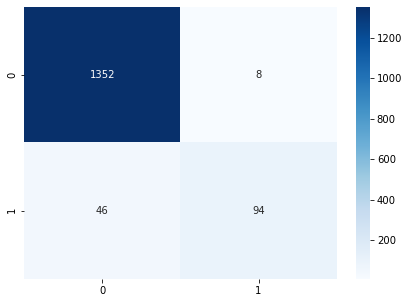

In [48]:
cm = metrics.confusion_matrix(y_test, y_predict, labels = [1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]])
                  
plt.figure(figsize = (7,5))
sns.heatmap(metrics.confusion_matrix(y_test, y_predict), annot = True, cmap = "Blues", fmt = "g");
print(metrics.confusion_matrix(y_test, y_predict))

From the above confusion matrix of logistic resgression , we can conclude the following findings:

True Positive(TP)(1, 1) - We correctly predicted 94 will take loan.

True Negative(TN)(0, 0) - We correctly predicted 1352 will not take loan.

False Positive(FP)(0, 1) - we incorrectly predicted that 46 will take loans when they actually did not take Loans.

False Negative (FN)(1, 0) - we incorrectly predicted that 8 will not take Loans when they actually did take Loans.

## 6. Give Business understanding of your model? (5 marks)

### From the avobe analysis we can understand the following business insights 

#### From the above consfusion matrix we can predict the person who is likely to get loan or not. It can be understand as:
True Positive (1, 1):

Predicted that the personal loan will be granted and the customer was eligibile for loan

False Positive (0, 1):

Predicted that the personal loan will be granted and the customer was not eligibile for loan

True Negative (0, 0):

Predicted that the personal loan will not be granted and the customer was not eligibile for loan

False Negative (1, 0):

Predicted that the personal loan will not be granted and the customer was eligibile for loan


#### Importnat Metrics
The bank will loose money if there were high number of False Positive (FP) cases. So the bank will try to minimize the FP findings. hence prescision is the important metric.

The bank will loose some customers in case of False Negative(FN) findings. But that's not going to affect much because bank wants to retain more money than customers.

After achieving the desired accuracy we can deploy the model for practical use. The bank now can predict who is eligible for personal loan. They can use the model for upcoming customers.